In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
# Import the requests library.
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
# Import the API key.
from config import weather_api_key
# print(weather_api_key)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#         print(city_weather)
#         print(city_data)
    # If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=nizhneyansk
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=belushya+guba
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=punta+arenas
Processing Record 3 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=jvari
Processing Record 4 of Set 1 | jvari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=cape+town
Processing Record 5 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=kodiak
Processing Record 4 of Set 2 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=riyadh
Processing Record 5 of Set 2 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=lieto
Processing Record 6 of Set 2 | lieto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=talara
Processing Record 7 of Set 2 | talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=east+london
Processing Record 8 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=kolpashevo
Processing Record 9 of Set 2 | kolpashevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=severo-yeniseyskiy
Processing Record 11 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=iqaluit
Processing Record 12 of Set 3 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=wasilla
Processing Record 13 of Set 3 | wasilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=acari
Processing Record 14 of Set 3 | acari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=tasiilaq
Processing Record 15 of Set 3 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=gat
Processing Record 16 of Set 3 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=hambantota
Processing Record 14 of Set 4 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=port+shepstone
Processing Record 15 of Set 4 | port shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=harper
Processing Record 16 of Set 4 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=castro
Processing Record 17 of Set 4 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=pisco
Processing Record 18 of Set 4 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=nadym
Processing Record 19 of Set 4 | nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=lompoc
Processing Record 17 of Set 5 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=mount+vernon
Processing Record 18 of Set 5 | mount vernon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=burica
Processing Record 19 of Set 5 | burica
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=qaanaaq
Processing Record 20 of Set 5 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=souillac
Processing Record 21 of Set 5 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=barcelos
Processing Record 22 of Set 5 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imp

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=vestmanna
Processing Record 20 of Set 6 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=santiago
Processing Record 21 of Set 6 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=naze
Processing Record 22 of Set 6 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=nikki
Processing Record 23 of Set 6 | nikki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=dubenskiy
Processing Record 24 of Set 6 | dubenskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=la+ronge
Processing Record 25 of Set 6 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=tabialan
Processing Record 26 of Set 7 | tabialan
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=meulaboh
Processing Record 27 of Set 7 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=havre-saint-pierre
Processing Record 28 of Set 7 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=taltal
Processing Record 29 of Set 7 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=bolungarvik
Processing Record 30 of Set 7 | bolungarvik
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=lebu
Processing Record 31 of Set 7 | lebu
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=umzimvubu
Processing Record 28 of Set 8 | umzimvubu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=caraballeda
Processing Record 29 of Set 8 | caraballeda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=turukhansk
Processing Record 30 of Set 8 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=tiznit
Processing Record 31 of Set 8 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=koshki
Processing Record 32 of Set 8 | koshki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=portalegre
Processing Record 33 of Set 8 | portalegre
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=santa+catalina
Processing Record 31 of Set 9 | santa catalina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=mayo
Processing Record 32 of Set 9 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=chipinge
Processing Record 33 of Set 9 | chipinge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=nguruka
Processing Record 34 of Set 9 | nguruka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=geraldton
Processing Record 35 of Set 9 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=hennenman
Processing Record 36 of Set 9 | hennenman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=linqiong
Processing Record 34 of Set 10 | linqiong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=palmer
Processing Record 35 of Set 10 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=tubmanburg
Processing Record 36 of Set 10 | tubmanburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=cururupu
Processing Record 37 of Set 10 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=mehamn
Processing Record 38 of Set 10 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=varzea+grande
Processing Record 39 of Set 10 | varzea grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=attawapiskat
Processing Record 36 of Set 11 | attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=santo+antonio+do+sudoeste
Processing Record 37 of Set 11 | santo antonio do sudoeste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=bonthe
Processing Record 38 of Set 11 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=paharpur
Processing Record 39 of Set 11 | paharpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=sao+borja
Processing Record 40 of Set 11 | sao borja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=labuan
Processing Record 41 of Set 11 | labuan
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=salalah
Processing Record 39 of Set 12 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=yerbogachen
Processing Record 40 of Set 12 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=fairbanks
Processing Record 41 of Set 12 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=enshi
Processing Record 42 of Set 12 | enshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=portobelo
Processing Record 43 of Set 12 | portobelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b90da3f8447cb2f9c12&q=elko
Processing Record 44 of Set 12 | elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f106f531b6c39b

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,71,0,13.80,CL,2022-06-13 18:13:25
1,Jvari,42.7169,42.0520,67.32,98,97,2.51,GE,2022-06-13 18:13:25
2,Cape Town,-33.9258,18.4232,55.11,94,75,5.75,ZA,2022-06-13 18:13:25
3,Wanning,18.8003,110.3967,81.01,93,100,10.47,CN,2022-06-13 18:13:25
4,Hasaki,35.7333,140.8333,61.29,72,100,14.03,JP,2022-06-13 18:13:26
5,Butaritari,3.0707,172.7902,81.52,73,30,11.79,KI,2022-06-13 18:13:26
6,Jamestown,42.0970,-79.2353,80.53,30,34,5.99,US,2022-06-13 18:13:26
7,Coquimbo,-29.9533,-71.3436,55.13,71,0,9.22,CL,2022-06-13 18:13:26
8,Paraiso,9.8383,-83.8656,74.95,81,100,1.97,CR,2022-06-13 18:13:27
9,Komatipoort,-25.4332,31.9548,62.94,41,0,4.59,ZA,2022-06-13 18:13:27


In [9]:
city_data

[{'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 48.31,
  'Humidity': 71,
  'Cloudiness': 0,
  'Wind Speed': 13.8,
  'Country': 'CL',
  'Date': '2022-06-13 18:13:25'},
 {'City': 'Jvari',
  'Lat': 42.7169,
  'Lng': 42.052,
  'Max Temp': 67.32,
  'Humidity': 98,
  'Cloudiness': 97,
  'Wind Speed': 2.51,
  'Country': 'GE',
  'Date': '2022-06-13 18:13:25'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 55.11,
  'Humidity': 94,
  'Cloudiness': 75,
  'Wind Speed': 5.75,
  'Country': 'ZA',
  'Date': '2022-06-13 18:13:25'},
 {'City': 'Wanning',
  'Lat': 18.8003,
  'Lng': 110.3967,
  'Max Temp': 81.01,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 10.47,
  'Country': 'CN',
  'Date': '2022-06-13 18:13:25'},
 {'City': 'Hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 61.29,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 14.03,
  'Country': 'JP',
  'Date': '2022-06-13 18:13:26'},
 {'City': 'Butaritari',
  'Lat': 3.0

In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-06-13 18:13:25,-53.1500,-70.9167,48.31,71,0,13.80
1,Jvari,GE,2022-06-13 18:13:25,42.7169,42.0520,67.32,98,97,2.51
2,Cape Town,ZA,2022-06-13 18:13:25,-33.9258,18.4232,55.11,94,75,5.75
3,Wanning,CN,2022-06-13 18:13:25,18.8003,110.3967,81.01,93,100,10.47
4,Hasaki,JP,2022-06-13 18:13:26,35.7333,140.8333,61.29,72,100,14.03


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

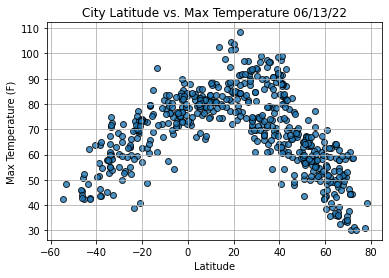

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

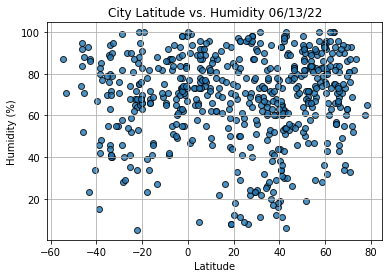

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

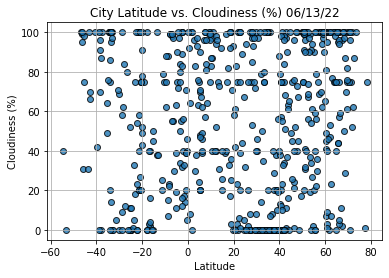

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

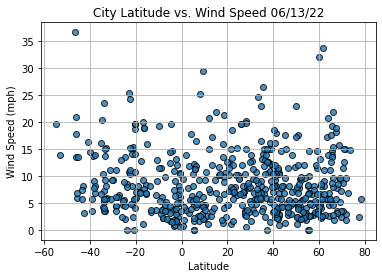

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

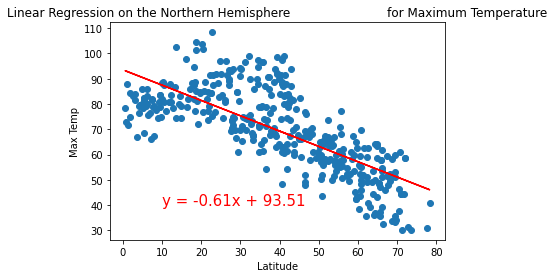

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

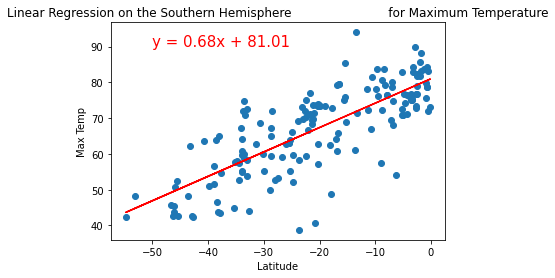

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

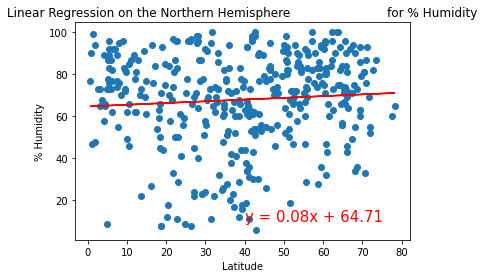

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

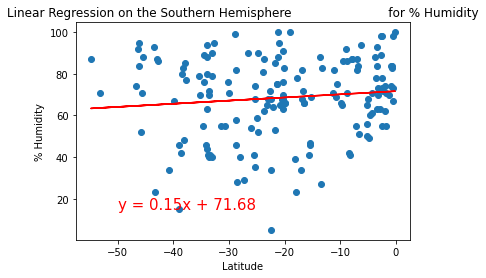

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

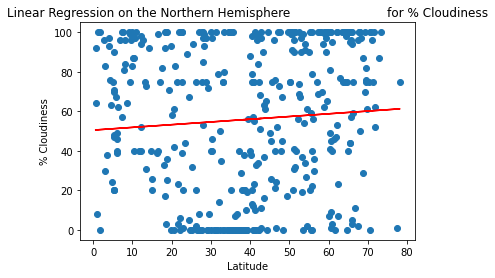

In [33]:
#Linear Regression on theNorthern Hemisphere and cloudiness%
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

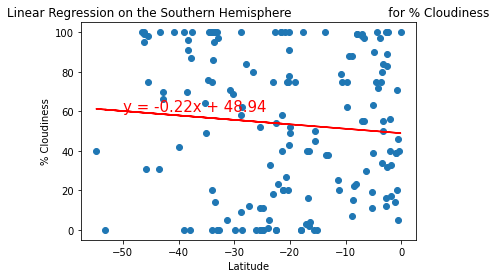

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

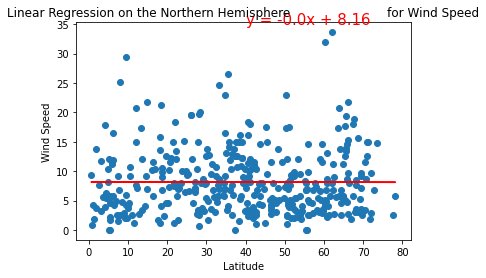

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

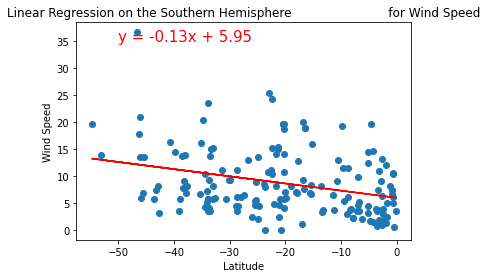

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))